# Задание к Проекту Статистический анализ данных и знакомство с данными.


## Задание к Проекту Статистический анализ данных.

Исследование для компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Для начала работы по проекту необходимо проверить данные на наличие пропусков, привести в соответствие их тип ,  удалить лишние и добавить необходимые значения. Затем следует исследовать полученные данные , сделать необходимые вычисления и визуализировать результаты.Проверить гипотезу о тарифах. По окончании работы следует сделать выводы. 


Тариф «Смарт»

1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:

o	минута разговора: 3 рубля

o	сообщение: 3 рубля

o	1 Гб интернет-трафика: 200 рублей


Тариф «Ультра»

1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:

o	минута разговора: 1 рубль

o	сообщение: 1 рубль

o	1 Гб интернет-трафика: 150 рублей


Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 

Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


## Загрузка и знакомство с данными проекта.

In [144]:
# загружаем необходимые библиотеки
import pandas as pd
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import numpy as np

<div class="alert alert-anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Данные не загружены

In [199]:
# чтение файлов с данными
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv',index_col=0)
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

### Знакомство с data_calls

In [200]:
print(data_calls.info()) # выведем на экран общую информвцию о data_calls 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [201]:
display(data_calls.head(),data_calls.tail()) # выведем первые  и последние 5 строк на экран

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


Таблица calls (информация о звонках):

•	id — уникальный номер звонка

•	call_date — дата звонка

•	duration — длительность звонка в минутах

•	user_id — идентификатор пользователя, сделавшего звонок


### Знакомство с data_internet

In [202]:
data_internet.info() # выведем на экран общую информвцию о data_internet 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [203]:
display(data_internet.head()) # выведем первые 5 строк на экран

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000



Таблица internet (информация об интернет-сессиях):

•	id — уникальный номер сессии

•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

•	session_date — дата интернет-сессии

•	user_id — идентификатор пользователя


### Знакомство с data_messages

In [204]:
data_messages.info() # выведем на экран общую информвцию о data_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [205]:
display(data_messages.head()) # выведем первые 5 строк на экран

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица messages (информация о сообщениях):

•	id — уникальный номер сообщения

•	message_date — дата сообщения

•	user_id — идентификатор пользователя, отправившего сообщение


### Знакомство с data_tariffs

In [206]:
data_tariffs.info() # выведем на экран общую информвцию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [207]:
display(data_tariffs) # выведем на экран

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs (информация о тарифах):

•	tariff_name — название тарифа

•	rub_monthly_fee — ежемесячная абонентская плата в рублях

•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

•	messages_included — количество сообщений в месяц, включённых в абонентскую плату

•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета

•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


### Знакомство с data_users

In [208]:
data_users.info()# выведем на экран общую информвцию о data_users


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [209]:
display(data_users.tail()) # выведем первые 5 строк на экран

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


Таблица users (информация о пользователях):

•	user_id — уникальный идентификатор пользователя

•	first_name — имя пользователя

•	last_name — фамилия пользователя

•	age — возраст пользователя (годы)

•	reg_date — дата подключения тарифа (день, месяц, год)

•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

•	city — город проживания пользователя

•	tariff — название тарифного плана


In [210]:
# выведем количество дубликатов
display(data_internet.duplicated().count())
display(data_calls.duplicated().count())
display(data_messages.duplicated().count())
display(data_tariffs.duplicated().count())
display(data_users.duplicated().count())

149396

202607

123036

2

500

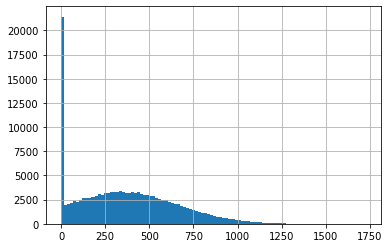

In [211]:
# построим гистограмму объёма интернет-сессий
data_internet ['mb_used'].hist(bins=100)

plt.show()

<div class="alert-info"> 
    
Количество обнаруженных дубликатов во всех таблицах равно количеству строк. 
    
* Гистограмма интернет трафика показала пик в области нулевых значений .

</div>    

# Подготовка данных

## 	Приведение данных к нужным типам,поиск и исправление ошибок в данных.


### Удаление столбцов 'Unnamed: 0 и 'id' в таблице data_internet.

In [212]:
data_internet.info() # выведем на экран общую информвцию о data_internet 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


В data_internet обнаружен безымянный столбец 'Unnamed: 0'и столбец 'id' , в которых дублирутся индексы. Их удаляем методом drop.

In [213]:
# удаляем методом drop колонки 'Unnamed: 0' и 'id'
#data_internet.drop(columns=['Unnamed: 0','id'], inplace=True)

display(data_internet.head()) # выведем первые  5 строк на экран

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Смена типа данных 'call_date' на целочисленный.

In [214]:
# выведем общую информацию

data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Сохраним в data_users_filtered  необходимые для анализа данные.

In [215]:
# для дальнейшей работы сохраним в data_users_filtered колонки 'user_id'и'tariff'
data_users_filtered = data_users[['user_id','city','tariff']]
# выведем первые 5 строк
print(data_users_filtered.head())

   user_id         city tariff
0     1000    Краснодар  ultra
1     1001       Москва  smart
2     1002  Стерлитамак  smart
3     1003       Москва  ultra
4     1004  Новокузнецк  ultra


In [216]:
# выведем общую информацию
data_users_filtered.info()
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  500 non-null    int64 
 1   city     500 non-null    object
 2   tariff   500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Соединим таблицы data_users и data_calls

In [217]:
# присоединим к data_users таблицу data_calls с помощью метода merge
data = data_users_filtered.merge(data_calls, on='user_id', how='left')

   

In [218]:
#округлим  время до целых минут
data['duration'] = np.ceil(data['duration'])


### Переименуем колонки

In [219]:
# переименуем колонку 'tariff_name' в 'tariff' и сохраним изменения в таблице
data_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

# выведем на экран data_tariffs
display(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Расчет показателей для каждого пользователя:

###	 количество сделанных звонков и израсходованных минут разговора по месяцам

In [220]:
# сгруппируем data по колонке 'user_id' и посчитаем количество израсходованных минут по месяцам
data_duration_month = data.groupby(['user_id', pd.to_datetime(data.call_date).dt.strftime('%Y-%m')])['duration'].sum().reset_index(name='duration_month')
# выведем на экран первые 5 строк
display(data_duration_month.head())
# выведем общую информацию
data_duration_month.info()

,user_id,call_date,duration_month
0,1000,2018-05,159.0
1,1000,2018-06,172.0
2,1000,2018-07,340.0
3,1000,2018-08,408.0
4,1000,2018-09,466.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3174 non-null   int64  
 1   call_date       3174 non-null   object 
 2   duration_month  3174 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 74.5+ KB


In [221]:
# сгруппируем data по колонке 'user_id' и посчитаем количество звонков по месяцам
data_call_month = data.groupby(['user_id', pd.to_datetime(data.call_date).dt.strftime('%Y-%m')])['id'].count().reset_index(name='call_month')

# выведем на экран первые 5 строк
display(data_call_month.head())
# выведем общую информацию
data_call_month.info()

,user_id,call_date,call_month
0,1000,2018-05,22
1,1000,2018-06,43
2,1000,2018-07,47
3,1000,2018-08,52
4,1000,2018-09,58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3174 non-null   int64 
 1   call_date   3174 non-null   object
 2   call_month  3174 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 74.5+ KB


### •	количество отправленных сообщений по месяцам

In [222]:
# сгруппируем data по колонке 'user_id' и посчитаем количество сообщений по месяцам
data_messages_month = data_messages.groupby(['user_id', pd.to_datetime(data_messages.message_date).dt.strftime('%Y-%m')])['id'].count().reset_index(name='messages_month')

pd.to_datetime(data_messages_month['message_date'])

# выведем на экран первые 5 строк
display(data_messages_month.head())

,user_id,message_date,messages_month
0,1000,2018-05,22
1,1000,2018-06,60
2,1000,2018-07,75
3,1000,2018-08,81
4,1000,2018-09,57


### •	объем израсходованного интернет-трафика по месяцам

In [223]:
# сгруппируем data по колонке 'user_id' и посчитаем количество Мбт трафика  по месяцам
data_mb_month = data_internet.groupby(['user_id', pd.to_datetime(data_internet.session_date).dt.strftime('%Y-%m')])['mb_used'].sum().reset_index(name='mb_month')

# выведем на экран первые 5 строк
display(data_mb_month.head())

,user_id,session_date,mb_month
0,1000,2018-05,2253.49
1,1000,2018-06,23233.77
2,1000,2018-07,14003.64
3,1000,2018-08,14055.93
4,1000,2018-09,14568.91


### •	Расчет помесячной выручки с каждого пользователя .

In [224]:
# выведем на экран data_tariffs
display(data_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [225]:
# соединим две таблицы по колонкам 'user_id'и'date' и сохраним в data_total_month
data_total_month = data_duration_month.merge(data_call_month, on =['user_id','call_date'],how='outer')

# переименуем колонки с датами в 'date' в остальных таблицах с сохранением изменений 
data_total_month.rename(columns={'call_date': 'date'}, inplace=True)
data_messages_month.rename(columns={'message_date': 'date'},inplace=True)
data_mb_month.rename(columns={'session_date': 'date'},inplace=True)


# соединим две таблицы по колонкам 'user_id'и'date' и сохраним изменения
data_total_month = data_total_month.merge(data_messages_month, on=['user_id','date'], how='outer')

data_total_month = data_total_month.merge(data_mb_month, on=['user_id','date'], how='outer')
# выведем на экран data_total_month
display(data_total_month.head())

,user_id,date,duration_month,call_month,messages_month,mb_month
0,1000,2018-05,159.0,22.0,22.0,2253.49
1,1000,2018-06,172.0,43.0,60.0,23233.77
2,1000,2018-07,340.0,47.0,75.0,14003.64
3,1000,2018-08,408.0,52.0,81.0,14055.93
4,1000,2018-09,466.0,58.0,57.0,14568.91


In [226]:
# выведем обшую информацию data_total_month
data_total_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   date            3214 non-null   object 
 2   duration_month  3174 non-null   float64
 3   call_month      3174 non-null   float64
 4   messages_month  2717 non-null   float64
 5   mb_month        3203 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 175.8+ KB


In [227]:
# сгруппируем data_total_month по колонке 'user_id' и выведем суммы за месяц
print(data_total_month.groupby('user_id').sum().head())


         duration_month  call_month  messages_month   mb_month
user_id                                                       
1000             2566.0       368.0           496.0  107392.31
1001              844.0       122.0             0.0   32466.00
1002             1517.0       217.0            70.0  116036.52
1003             3822.0       520.0           380.0   57280.64
1004              987.0       176.0          1192.0  149039.48


In [228]:
# присоединим к data_total_month  data_users_filtered по колонке 'user_id' соханим изменеия 
data_total_month = data_users_filtered.merge(data_total_month, on=['user_id'], how='left')
# выведем первые 5 строк полученного массива
display(data_total_month.head())
# выведем общую информацию data_total_month
data_total_month.info()


,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month
0,1000,Краснодар,ultra,2018-05,159.0,22.0,22.0,2253.49
1,1000,Краснодар,ultra,2018-06,172.0,43.0,60.0,23233.77
2,1000,Краснодар,ultra,2018-07,340.0,47.0,75.0,14003.64
3,1000,Краснодар,ultra,2018-08,408.0,52.0,81.0,14055.93
4,1000,Краснодар,ultra,2018-09,466.0,58.0,57.0,14568.91


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3216 non-null   int64  
 1   city            3216 non-null   object 
 2   tariff          3216 non-null   object 
 3   date            3214 non-null   object 
 4   duration_month  3174 non-null   float64
 5   call_month      3174 non-null   float64
 6   messages_month  2717 non-null   float64
 7   mb_month        3203 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 226.1+ KB


In [229]:
# присоединим к data_total_month значения data_tariffs и сохраним изменения 
data_total_month = data_total_month.merge(data_tariffs,on=['tariff'], how='left')

# выведем первые 5 строк data_total_month на экран
display(data_total_month.head())

# выведем общую информвцию по data_total_month на экран
data_total_month.info()


,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,2018-05,159.0,22.0,22.0,2253.49,1000,30720,3000,1950,150,1,1
1,1000,Краснодар,ultra,2018-06,172.0,43.0,60.0,23233.77,1000,30720,3000,1950,150,1,1
2,1000,Краснодар,ultra,2018-07,340.0,47.0,75.0,14003.64,1000,30720,3000,1950,150,1,1
3,1000,Краснодар,ultra,2018-08,408.0,52.0,81.0,14055.93,1000,30720,3000,1950,150,1,1
4,1000,Краснодар,ultra,2018-09,466.0,58.0,57.0,14568.91,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   city                   3216 non-null   object 
 2   tariff                 3216 non-null   object 
 3   date                   3214 non-null   object 
 4   duration_month         3174 non-null   float64
 5   call_month             3174 non-null   float64
 6   messages_month         2717 non-null   float64
 7   mb_month               3203 non-null   float64
 8   messages_included      3216 non-null   int64  
 9   mb_per_month_included  3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  rub_monthly_fee        3216 non-null   int64  
 12  rub_per_gb             3216 non-null   int64  
 13  rub_per_message        3216 non-null   int64  
 14  rub_per_minute         3216 non-null   int64  
dtypes: f

In [230]:
# выведем строки с пропусками в колонке 'date'
data_total_month[data_total_month['date'].isna()]

,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
827,1128,Волжский,ultra,NaN,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
2335,1371,Омск,smart,NaN,NaN,NaN,NaN,NaN,50,15360,500,550,200,3,3


In [231]:
# посмотрим информацию о клиентах с пропусками в файле data_users
display(data_users.query('user_id==1128'))
display(data_users.query('user_id==1371'))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [232]:
#заменим пропуски в дате на декабрь
data_total_month ['date']= data_total_month['date'].fillna(12)

In [52]:
# посмотрим информацию о клиентах с пропусками в файле data_users
display(data_users.query('user_id==1128'))
display(data_users.query('user_id==1371'))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [233]:
# выведем строки с пропусками в колонке 'date' для контроля
data_total_month[data_total_month['date'].isna()]

,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [234]:
#заменим остальные пропущенные значения на 0
data_total_month = data_total_month.fillna(0)

In [182]:
#  выведем общую информацию
data_total_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   city                   3216 non-null   object 
 2   tariff                 3216 non-null   object 
 3   date                   3216 non-null   object 
 4   duration_month         3216 non-null   float64
 5   call_month             3216 non-null   float64
 6   messages_month         3216 non-null   float64
 7   mb_month               3216 non-null   float64
 8   messages_included      3216 non-null   int64  
 9   mb_per_month_included  3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  rub_monthly_fee        3216 non-null   int64  
 12  rub_per_gb             3216 non-null   int64  
 13  rub_per_message        3216 non-null   int64  
 14  rub_per_minute         3216 non-null   int64  
dtypes: f

In [235]:
# напишем функцию для  подсчета выручки за разговоры с каждого пользователя

def make_call_revenue(row):
    duration_month = row['duration_month'] 
    minutes_included = row['minutes_included']
    rub_per_minute = row['rub_per_minute']
    call_revenue = 0
    
    
    if duration_month >= minutes_included:
        call_revenue += (duration_month - minutes_included) * rub_per_minute
    return call_revenue
    
# проверим работу функции      

row_values = [15000.06,3000,1]

row_columns = ['duration_month', 'minutes_included','rub_per_minute']
       
        
row = pd.Series(data=row_values, index=row_columns)         

print(make_call_revenue(row)) 




12000.06


In [236]:
# в колонке 'call_revenue' сохоаним результат  функции make_call_revenue
data_total_month['call_revenue'] = data_total_month.apply(make_call_revenue,axis=1)
# выведем на экран первые 5 строк data_total_month
display(data_total_month.head())
# выведем на экран последние 5 строк data_total_month
display(data_total_month.tail())

,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue
0,1000,Краснодар,ultra,2018-05,159.0,22.0,22.0,2253.49,1000,30720,3000,1950,150,1,1,0.0
1,1000,Краснодар,ultra,2018-06,172.0,43.0,60.0,23233.77,1000,30720,3000,1950,150,1,1,0.0
2,1000,Краснодар,ultra,2018-07,340.0,47.0,75.0,14003.64,1000,30720,3000,1950,150,1,1,0.0
3,1000,Краснодар,ultra,2018-08,408.0,52.0,81.0,14055.93,1000,30720,3000,1950,150,1,1,0.0
4,1000,Краснодар,ultra,2018-09,466.0,58.0,57.0,14568.91,1000,30720,3000,1950,150,1,1,0.0


,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue
3211,1498,Владикавказ,smart,2018-10,247.0,41.0,42.0,20579.36,50,15360,500,550,200,3,3,0.0
3212,1499,Пермь,smart,2018-09,70.0,9.0,11.0,1845.75,50,15360,500,550,200,3,3,0.0
3213,1499,Пермь,smart,2018-10,449.0,68.0,48.0,17788.51,50,15360,500,550,200,3,3,0.0
3214,1499,Пермь,smart,2018-11,612.0,74.0,59.0,17963.31,50,15360,500,550,200,3,3,336.0
3215,1499,Пермь,smart,2018-12,492.0,69.0,66.0,13055.58,50,15360,500,550,200,3,3,0.0


In [237]:
# напишем функцию для  подсчета выручки за сообщения с каждого пользователя

def make_messagе_revenue(row):
    messages_month = row['messages_month'] 
    messages_included = row['messages_included']
    rub_per_message = row['rub_per_message']
    messages_revenue = 0
    
    
    if messages_month >= messages_included:
        messages_revenue += (messages_month - messages_included) * rub_per_message
    return messages_revenue
    
# проверим работу функции      

row_values = [111,50,3]

row_columns = ['messages_month', 'messages_included','rub_per_message']
       
        
row = pd.Series(data=row_values, index=row_columns)         

print(make_messagе_revenue(row)) 



183


In [238]:
# в колонке 'messagе_revenue' сохоаним результат  функции make_messagе_revenue
data_total_month['messagе_revenue'] = data_total_month.apply(make_messagе_revenue,axis=1)
# выведем на экран первые 5 строк data_total_month
display(data_total_month.head())
# выведем на экран последние 5 строк data_total_month
display(data_total_month.tail())

,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,messagе_revenue
0,1000,Краснодар,ultra,2018-05,159.0,22.0,22.0,2253.49,1000,30720,3000,1950,150,1,1,0.0,0.0
1,1000,Краснодар,ultra,2018-06,172.0,43.0,60.0,23233.77,1000,30720,3000,1950,150,1,1,0.0,0.0
2,1000,Краснодар,ultra,2018-07,340.0,47.0,75.0,14003.64,1000,30720,3000,1950,150,1,1,0.0,0.0
3,1000,Краснодар,ultra,2018-08,408.0,52.0,81.0,14055.93,1000,30720,3000,1950,150,1,1,0.0,0.0
4,1000,Краснодар,ultra,2018-09,466.0,58.0,57.0,14568.91,1000,30720,3000,1950,150,1,1,0.0,0.0


,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,messagе_revenue
3211,1498,Владикавказ,smart,2018-10,247.0,41.0,42.0,20579.36,50,15360,500,550,200,3,3,0.0,0.0
3212,1499,Пермь,smart,2018-09,70.0,9.0,11.0,1845.75,50,15360,500,550,200,3,3,0.0,0.0
3213,1499,Пермь,smart,2018-10,449.0,68.0,48.0,17788.51,50,15360,500,550,200,3,3,0.0,0.0
3214,1499,Пермь,smart,2018-11,612.0,74.0,59.0,17963.31,50,15360,500,550,200,3,3,336.0,27.0
3215,1499,Пермь,smart,2018-12,492.0,69.0,66.0,13055.58,50,15360,500,550,200,3,3,0.0,48.0


In [239]:
# напишем функцию для  подсчета выручки за интернет с каждого пользователя

def make_internet_revenue(row):
    mb_month = row['mb_month'] 
    mb_per_month_included = row['mb_per_month_included']
    rub_per_gb = row['rub_per_gb']
    internet_revenue = 0
    
    
    if mb_month >= mb_per_month_included:
        internet_revenue += math.ceil((mb_month - mb_per_month_included)/1024) * rub_per_gb
    return internet_revenue
    
# проверим работу функции      

row_values = [17663.31,15360,200]

row_columns = ['mb_month', 'mb_per_month_included','rub_per_gb']
       
        
row = pd.Series(data=row_values, index=row_columns)         

print(make_internet_revenue(row)) 



600.0


In [240]:
# в колонке 'internet_revenue' сохраним результат  функции make_internet_revenue
data_total_month['internet_revenue'] = data_total_month.apply(make_internet_revenue,axis=1)
# выведем на экран первые 5 строк data_total_month
display(data_total_month.head())
# выведем на экран последние 5 строк data_total_month
data_total_month.info()

,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,messagе_revenue,internet_revenue
0,1000,Краснодар,ultra,2018-05,159.0,22.0,22.0,2253.49,1000,30720,3000,1950,150,1,1,0.0,0.0,0
1,1000,Краснодар,ultra,2018-06,172.0,43.0,60.0,23233.77,1000,30720,3000,1950,150,1,1,0.0,0.0,0
2,1000,Краснодар,ultra,2018-07,340.0,47.0,75.0,14003.64,1000,30720,3000,1950,150,1,1,0.0,0.0,0
3,1000,Краснодар,ultra,2018-08,408.0,52.0,81.0,14055.93,1000,30720,3000,1950,150,1,1,0.0,0.0,0
4,1000,Краснодар,ultra,2018-09,466.0,58.0,57.0,14568.91,1000,30720,3000,1950,150,1,1,0.0,0.0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   city                   3216 non-null   object 
 2   tariff                 3216 non-null   object 
 3   date                   3216 non-null   object 
 4   duration_month         3216 non-null   float64
 5   call_month             3216 non-null   float64
 6   messages_month         3216 non-null   float64
 7   mb_month               3216 non-null   float64
 8   messages_included      3216 non-null   int64  
 9   mb_per_month_included  3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  rub_monthly_fee        3216 non-null   int64  
 12  rub_per_gb             3216 non-null   int64  
 13  rub_per_message        3216 non-null   int64  
 14  rub_per_minute         3216 non-null   int64  
 15  call

In [241]:
# выведем количество пропусков в колонке 'messages_month'
data_total_month.isnull().sum() 

# заменим пропуски в колонке 'messages_month' на 0
# data_total_month.fillna(0,inplace = True)

# приведём данные колонок 'call_revenue' и 'messagе_revenue' к целочисленному типу
data_total_month = data_total_month.astype({'call_revenue':'int64',
                                            'messagе_revenue':'int64',
                                            'duration_month':'int64',
                                           'messages_month':'int64',
                                           'mb_month':'int64'})

# # выведем на экран первые 5 строк data_total_month
data_total_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   city                   3216 non-null   object 
 2   tariff                 3216 non-null   object 
 3   date                   3216 non-null   object 
 4   duration_month         3216 non-null   int64  
 5   call_month             3216 non-null   float64
 6   messages_month         3216 non-null   int64  
 7   mb_month               3216 non-null   int64  
 8   messages_included      3216 non-null   int64  
 9   mb_per_month_included  3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  rub_monthly_fee        3216 non-null   int64  
 12  rub_per_gb             3216 non-null   int64  
 13  rub_per_message        3216 non-null   int64  
 14  rub_per_minute         3216 non-null   int64  
 15  call

In [242]:
# в колонке 'revenue' сохраним сумму выручки
data_total_month['revenue'] = data_total_month['rub_monthly_fee'] + data_total_month['call_revenue'] + data_total_month['messagе_revenue'] + data_total_month['internet_revenue']
# выведем первые 5 строк data_total_month на экран
display(data_total_month.head())

,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,messagе_revenue,internet_revenue,revenue
0,1000,Краснодар,ultra,2018-05,159,22.0,22,2253,1000,30720,3000,1950,150,1,1,0,0,0,1950
1,1000,Краснодар,ultra,2018-06,172,43.0,60,23233,1000,30720,3000,1950,150,1,1,0,0,0,1950
2,1000,Краснодар,ultra,2018-07,340,47.0,75,14003,1000,30720,3000,1950,150,1,1,0,0,0,1950
3,1000,Краснодар,ultra,2018-08,408,52.0,81,14055,1000,30720,3000,1950,150,1,1,0,0,0,1950
4,1000,Краснодар,ultra,2018-09,466,58.0,57,14568,1000,30720,3000,1950,150,1,1,0,0,0,1950


# Анализ полученных данных

## Разделим данные в соответствие с тарифом.

In [245]:
#сохраним в переменную data_total_month_smart  всех клиентов тарифа smart
data_total_month_smart = data_total_month.loc[data_total_month['tariff']=='smart']
# выведем первые 5 строк на экран
display(data_total_month_smart.head())
# выведем общую информацию на экран
data_total_month_smart.info()

,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,messagе_revenue,internet_revenue,revenue
8,1001,Москва,smart,2018-11,430,59.0,0,18429,50,15360,500,550,200,3,3,0,0,600,1150
9,1001,Москва,smart,2018-12,414,63.0,0,14036,50,15360,500,550,200,3,3,0,0,0,550
10,1002,Стерлитамак,smart,2018-06,117,15.0,4,10856,50,15360,500,550,200,3,3,0,0,0,550
11,1002,Стерлитамак,smart,2018-07,214,26.0,11,17580,50,15360,500,550,200,3,3,0,0,600,1150
12,1002,Стерлитамак,smart,2018-08,289,42.0,13,20319,50,15360,500,550,200,3,3,0,0,1000,1550


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 8 to 3215
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2230 non-null   int64  
 1   city                   2230 non-null   object 
 2   tariff                 2230 non-null   object 
 3   date                   2230 non-null   object 
 4   duration_month         2230 non-null   int64  
 5   call_month             2230 non-null   float64
 6   messages_month         2230 non-null   int64  
 7   mb_month               2230 non-null   int64  
 8   messages_included      2230 non-null   int64  
 9   mb_per_month_included  2230 non-null   int64  
 10  minutes_included       2230 non-null   int64  
 11  rub_monthly_fee        2230 non-null   int64  
 12  rub_per_gb             2230 non-null   int64  
 13  rub_per_message        2230 non-null   int64  
 14  rub_per_minute         2230 non-null   int64  
 15  call

In [246]:
# сохраним в переменную data_total_month_ultra  всех клиентов тарифа ultra
data_total_month_ultra = data_total_month.loc[data_total_month['tariff']=='ultra']
# выведем первые 5 строк data_total_month_ultra на экран
display(data_total_month_ultra.head())
# выведем общую информацию data_total_month_ultra
data_total_month_ultra.info()

,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,messagе_revenue,internet_revenue,revenue
0,1000,Краснодар,ultra,2018-05,159,22.0,22,2253,1000,30720,3000,1950,150,1,1,0,0,0,1950
1,1000,Краснодар,ultra,2018-06,172,43.0,60,23233,1000,30720,3000,1950,150,1,1,0,0,0,1950
2,1000,Краснодар,ultra,2018-07,340,47.0,75,14003,1000,30720,3000,1950,150,1,1,0,0,0,1950
3,1000,Краснодар,ultra,2018-08,408,52.0,81,14055,1000,30720,3000,1950,150,1,1,0,0,0,1950
4,1000,Краснодар,ultra,2018-09,466,58.0,57,14568,1000,30720,3000,1950,150,1,1,0,0,0,1950


<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 3192
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                986 non-null    int64  
 1   city                   986 non-null    object 
 2   tariff                 986 non-null    object 
 3   date                   986 non-null    object 
 4   duration_month         986 non-null    int64  
 5   call_month             986 non-null    float64
 6   messages_month         986 non-null    int64  
 7   mb_month               986 non-null    int64  
 8   messages_included      986 non-null    int64  
 9   mb_per_month_included  986 non-null    int64  
 10  minutes_included       986 non-null    int64  
 11  rub_monthly_fee        986 non-null    int64  
 12  rub_per_gb             986 non-null    int64  
 13  rub_per_message        986 non-null    int64  
 14  rub_per_minute         986 non-null    int64  
 15  call_

## Анализ поведения пользователей. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

### Сравнительный анализ минут разговора

count    2229.000000
mean      417.611934
std       190.411806
min         0.000000
25%       282.000000
50%       421.000000
75%       545.000000
max      1435.000000
Name: duration_month, dtype: float64


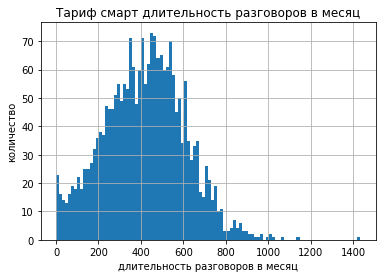

In [105]:
# выведем на экран информацию об основных показателях data_total_month_smart
print(data_total_month_smart['duration_month'].describe()) 
# построим гистограмму data_smart_duration
data_total_month_smart['duration_month'].hist(bins=100, range=(0, 1435)); 
plt.title("Тариф смарт длительность разговоров в месяц")
plt.xlabel("длительность разговоров в месяц")
plt.ylabel("количество")
plt.show()

In [248]:
# посчитаем среднее значение, стандартное отклонение и дисперсию длительности звонков пользователей тарифа smart
print('Среднее значение:',data_total_month_smart['duration_month'].mean())

print('Стандартное отклонение:',np.std(data_total_month_smart['duration_month']))

print('Дисперсия составляет:',np.var(data_total_month_smart['duration_month']))

print('Количество минут разговоров:',data_total_month_smart['duration_month'].mean()+3*np.std(data_total_month_smart['duration_month']))

Среднее значение: 417.747533632287
Стандартное отклонение: 190.4340414765959
Дисперсия составляет: 36265.12415310985
Количество минут разговоров: 989.0496580620747


count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: duration_month, dtype: float64


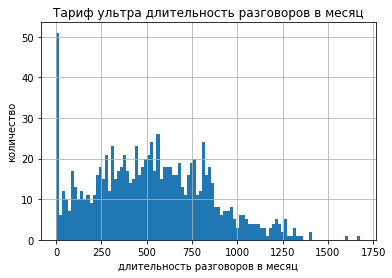

In [249]:
# выведем на экран информацию об основных показателях data_total_month_ultra
print(data_total_month_ultra['duration_month'].describe()) 
# построим гистограмму data_total_month_ultra['duration_month']
data_total_month_ultra['duration_month'].hist(bins=100, range=(0, 1680)) 
plt.title("Тариф ультра длительность разговоров в месяц")
plt.xlabel("длительность разговоров в месяц")
plt.ylabel("количество")
plt.show()

In [250]:
# посчитаем среднее значение, стандартное отклонение и дисперсию длительности звонков пользователей тарифа ultra
print('Среднее значение:',data_total_month_ultra['duration_month'].mean())

print('Стандартное отклонение:',np.std(data_total_month_ultra['duration_month']))

print('Дисперсия составляет:',np.var(data_total_month_ultra['duration_month']))

print('Количество минут разговоров:',data_total_month_ultra['duration_month'].mean()+3*np.std(data_total_month_ultra['duration_month']))

Среднее значение: 526.0892494929006
Стандартное отклонение: 317.72630711559117
Дисперсия составляет: 100950.00623331097
Количество минут разговоров: 1479.268170839674


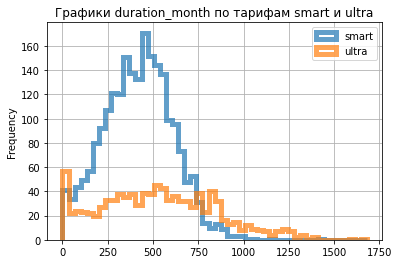

In [251]:
# построим две гистограммы 'duration_month' по тарифам 'smart' и 'ultra' на одном графике 
ax = data_total_month_smart['duration_month'].plot(
    kind='hist',
    y='duration_month',
    histtype='step',
    range=(0, 1680),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='smart',
    legend=True
)
data_total_month_ultra['duration_month'].plot(
    kind='hist',
    y='duration_month',
    histtype='step',
    range=(0, 1680),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.title('Графики duration_month по тарифам smart и ultra')
plt.show()

* Среднее значение duration_month среди ползователей тарифа smart составляет 417.7, стандарное отклонение-190.4, посчитаем дисперсию-36265. Количество минут разговоров пользователей тарифа смарт найдем по правилу 3 сигм: mean+3*std = 989 минут.  

* Среднее значение duration_month среди ползователей тарифа ultra составляет 526, стандарное отклонение-317.7, посчитаем дисперсию-100950. Количество минут разговоров пользователей тарифа ультра найдем по правилу 3 сигм: mean+3*std = 1479.2 минут.


Пользователи тарифа СМАРТ используют в среднем почти в 2 раза больше минут разговоров сверх тарифа, тогда как пользователи тарифа УЛЬТРА в среднем  не используют и половины лимита включенного в тариф. Цена 1 минуты разговора в тарифе СМАРТ - 3 руб., а цена 1 минуты разгорора в тарифе УЛЬТРА - 1 руб.

### Сравнительный анализ количества сообщений в тарифах.

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_month, dtype: float64


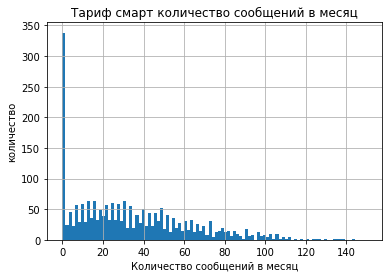

In [253]:
# выведем на экран информацию об основных показателях data_total_month_smart['messages_month']
print(data_total_month_smart['messages_month'].describe()) 
# построим гистограмму data_total_month_smart['messages_month']
data_total_month_smart['messages_month'].hist(bins=100, range=(0, 150)); 
plt.title("Тариф смарт количество сообщений в месяц")
plt.xlabel("Количество сообщений в месяц")
plt.ylabel("количество")
plt.show()

In [254]:
# посчитаем среднее значение,стандартное отклонение и дисперсию количества сообщений пользователей тарифа smart
print('Среднее значение:',data_total_month_smart['messages_month'].mean())

print('Стандартное отклонение количества сообщений тарифа smart:',np.std(data_total_month_smart['messages_month']))

print('Дисперсия количества сообщений тарифа smart:',np.var(data_total_month_smart['messages_month']))

print('Количество сообщений:',data_total_month_smart['messages_month'].mean()+3*np.std(data_total_month_smart['messages_month']))

Среднее значение: 33.36905829596412
Стандартное отклонение количества сообщений тарифа smart: 28.224065559229217
Дисперсия количества сообщений тарифа smart: 796.5978766916688
Количество сообщений: 118.04125497365177


count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: messages_month, dtype: float64


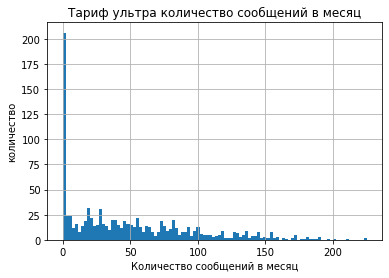

In [255]:
# выведем на экран информацию об основных показателях data_total_month_ultra['messages_month']
print(data_total_month_ultra['messages_month'].describe()) 
# построим гистограмму data_total_month_ultra
data_total_month_ultra['messages_month'].hist(bins=100, range=(0, 225)); 
plt.title("Тариф ультра количество сообщений в месяц")
plt.xlabel("Количество сообщений в месяц")
plt.ylabel("количество")


plt.show()

In [256]:
# посчитаем среднее значение, стандартное отклонение, дисперсию и количество сообщений пользователей тарифа ultra
print('Среднее значение:',data_total_month_ultra['messages_month'].mean())

print('Стандартное отклонение количества сообщений тарифа ultra:',np.std(data_total_month_ultra['messages_month']))

print('Дисперсия количества сообщений тарифа составляет ultra:',np.var(data_total_month_ultra['messages_month']))

print('Количество сообщений:',data_total_month_ultra['messages_month'].mean()+3*np.std(data_total_month_ultra['messages_month']))

Среднее значение: 49.31338742393509
Стандартное отклонение количества сообщений тарифа ultra: 47.781791061922284
Дисперсия количества сообщений тарифа составляет ultra: 2283.0995570851965
Количество сообщений: 192.65876060970194


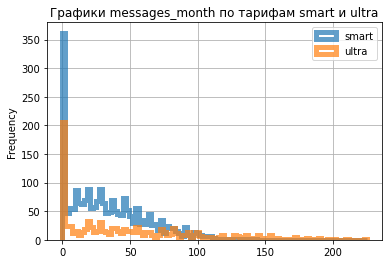

In [257]:
# построим две гистограммы 'messages_month' по тарифам 'smart' и 'ultra' на одном графике 
ax = data_total_month_smart['messages_month'].plot(
    kind='hist',
    y='messages_month',
    histtype='step',
    range=(0, 225),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='smart',
    legend=True
)
data_total_month_ultra['messages_month'].plot(
    kind='hist',
    y='messages_month',
    histtype='step',
    range=(0, 225),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.title('Графики messages_month по тарифам smart и ultra')
plt.show()

* Среднее значение messages_month среди пользователей тарифа smart составляет 33.3, стандарное отклонение-28.2, посчитаем дисперсию-796.5. Количество сообщений ползователей тарифа сигма найдем по правилу 3 сигм: mean+3*std = 118 сообщения.

* Среднее значение messages_month среди пользователей тарифа ultra составляет 49.3, стандарное отклонение-47.7, посчитаем дисперсию-2283. Количество сообщений ползователей тарифа ультра найдем по правилу 3 сигм: mean+3*std = 192 сообщений.

Обращает на себя внимание тот факт, что большое количество пользователей почти не используют сообщения- пики на уровне значения 0 имеют оба графика.
Пользователи тарифа УЛЬТРА в среднем используют лишь 5 % входящих в тариф сообщений , тогда как пользователи тарифа СМАРТ в среднем используют в 2 с лишним раза больше сообщений,чем входит в тариф. При этом цена 1 сообщения тарифа СМАРТ- 3 руб., а цена 1 сообщения тарифа УЛЬТРА -1 руб.

### Сравнительный анализ интернет- трафика в тарифах.

In [259]:
# добавим колонку ['gb_month'] , в которую поместим трафик в гигабайтах округлённых до целого

data_total_month_smart['gb_month'] = np.ceil(data_total_month_smart['mb_month']/1024)

data_total_month_ultra['gb_month'] = np.ceil(data_total_month_ultra['mb_month']/1024)


/tmp/ipykernel_37/828632153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total_month_smart['gb_month'] = np.ceil(data_total_month_smart['mb_month']/1024)
/tmp/ipykernel_37/828632153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total_month_ultra['gb_month'] = np.ceil(data_total_month_ultra['mb_month']/1024)


count    2230.000000
mean       16.321525
std         5.756167
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_month, dtype: float64


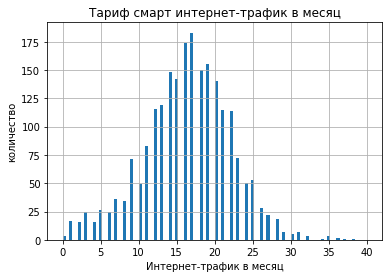

In [260]:
# выведем на экран информацию об основных показателях data_total_month_smart['gb_month']
print(data_total_month_smart['gb_month'].describe()) 
# построим гистограмму data_smart_internet
(data_total_month_smart['gb_month']).hist(bins=100, range=(0, 40)); 
plt.title("Тариф смарт интернет-трафик в месяц")
plt.xlabel("Интернет-трафик в месяц")
plt.ylabel("количество")
plt.show()

In [261]:
# постчитаем  среднее значение,стандартное отклонение, дисперсию и количество интернет-трафика пользователей тарифа smart
print('Среднее значение:',data_total_month_smart['gb_month'].mean())

print('Стандартное отклонение интернет-трафика тарифа smart:',np.std(data_total_month_smart['gb_month']))

print('Дисперсия интернет-трафика тарифа smart составляет :',np.var(data_total_month_smart['gb_month']))

print('Количество интернет-трафика :',data_total_month_smart['gb_month'].mean()+3*np.std(data_total_month_smart['gb_month']))

Среднее значение: 16.32152466367713
Стандартное отклонение интернет-трафика тарифа smart: 5.754875757548352
Дисперсия интернет-трафика тарифа smart составляет : 33.11859498481772
Количество интернет-трафика : 33.58615193632219


count    986.000000
mean      19.474645
std        9.868057
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_month, dtype: float64


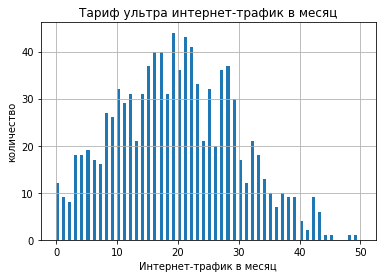

In [262]:
# выведем на экран информацию об основных показателях data_total_month_ultra['gb_month']
print(data_total_month_ultra['gb_month'].describe()) 
# построим гистограмму data_ultra_internet
data_total_month_ultra['gb_month'].hist(bins=100, range=(0, 50)); 
plt.title("Тариф ультра интернет-трафик в месяц")
plt.xlabel("Интернет-трафик в месяц")
plt.ylabel("количество")
plt.show()

In [263]:
# постчитаем среднее значение, стандартное отклонение, дисперсию и количесво  интернет-трафика пользователей тарифа ultra
print('Среднее значение:',data_total_month_ultra['gb_month'].mean())

print('Стандартное отклонение интернет-трафика тарифа ultra:',np.std(data_total_month_ultra['gb_month']))

print('Дисперсия интернет-трафика тарифа ultra составляет :',np.var(data_total_month_ultra['gb_month']))

print('Количество интернет-трафика :',data_total_month_ultra['gb_month'].mean()+3*np.std(data_total_month_ultra['gb_month']))

Среднее значение: 19.474645030425965
Стандартное отклонение интернет-трафика тарифа ultra: 9.863051408616236
Дисперсия интернет-трафика тарифа ultra составляет : 97.27978308900674
Количество интернет-трафика : 49.06379925627468


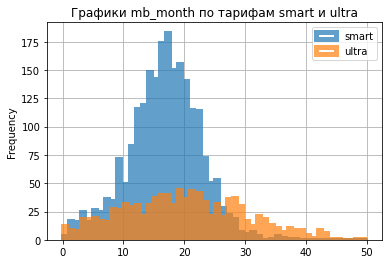

In [264]:
# построим две гистограммы 'mb_month' по тарифам 'smart' и 'ultra' на одном графике 
ax = data_total_month_smart['gb_month'].plot(
    kind='hist',
    y='mb_month',
    histtype='step',
    range=(0, 50),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='smart',
    legend=True
)
data_total_month_ultra['gb_month'].plot(
    kind='hist',
    y='mb_month',
    histtype='step',
    range=(0, 50),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
)
plt.title('Графики mb_month по тарифам smart и ultra')
plt.show()

* Среднее значение mb_month среди ползователей тарифа smart составляет 16.3, стандарное отклонение-5.7, посчитаем дисперсию-33.1. Количество интернет-трафика ползователей тарифа сигма найдем по правилу 3 сигм: mean+3*std = 33.5 гБт. 

Пользователи этого тарифа используют интернет-трафик в среднем в 2 с лишним раз больше включенного в тариф трафика. Стоимость o	1 Гб интернет-трафика: 200 рублей- выше чем в тарифе УЛЬТРА.

* Среднее значение mb_month среди ползователей тарифа ultra составляет 19.4, стандарное отклонение-9.8, посчитаем дисперсию-97.2. Количество интернет-трафика ползователей тарифа ультра найдем по правилу 3 сигм: mean+3*std = 49 гБт.


Пользователи этого тарифа используют интернет-трафик в среднем в 0,6 раз больше включенного в тариф трафика. Стоимость 	1 Гб интернет-трафика: 150 рублей- ниже чем в тарифе СМАРТ.

### Сравнительный анализ выручки в тарифах.

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64


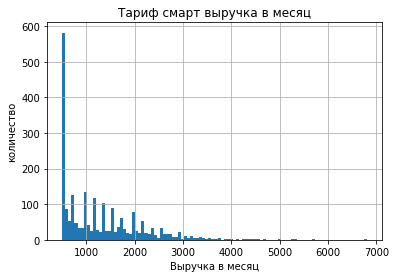

In [266]:
# выведем на экран информацию об основных показателях data_total_month_smart['revenue']
print(data_total_month_smart['revenue'].describe()) 
# построим гистограмму data_smart_internet
(data_total_month_smart['revenue']).hist(bins=100, range=(500, 6800)); 
plt.title("Тариф смарт выручка в месяц")
plt.xlabel("Выручка в месяц")
plt.ylabel("количество")
plt.show()

count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64


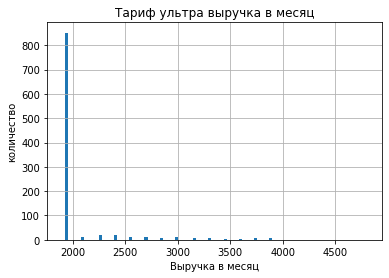

In [267]:
# выведем на экран информацию об основных показателях data_total_month_ultra['revenue']
print(data_total_month_ultra['revenue'].describe()) 
# построим гистограмму data_smart_internet
(data_total_month_ultra['revenue']).hist(bins=100, range=(1900, 4800)); 
plt.title("Тариф ультра выручка в месяц")
plt.xlabel("Выручка в месяц")
plt.ylabel("количество")
plt.show()

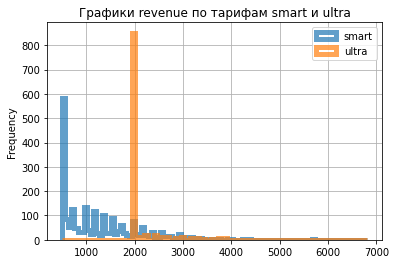

In [268]:
# построим две гистограммы 'mb_month' по тарифам 'smart' и 'ultra' на одном графике 
ax = data_total_month_smart['revenue'].plot(
    kind='hist',
    y='revenue',
    histtype='step',
    range=(500, 6800),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='smart',
    legend=True
)
data_total_month_ultra['revenue'].plot(
    kind='hist',
    y='revenue',
    histtype='step',
    range=(500, 6800),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
)
plt.title('Графики revenue по тарифам smart и ultra')
plt.show()

In [269]:
# выведем на экран общую выручку тарифов смарт и ультра
print('Выручка тарифа СМАРТ за месяц :',data_total_month_smart['revenue'].sum())
print('Выручка тарифа УЛЬТРА за месяц :',data_total_month_ultra['revenue'].sum())

Выручка тарифа СМАРТ за месяц : 2875901
Выручка тарифа УЛЬТРА за месяц : 2041050




Средняя выручка пользователя тарифа СМАРТ составляет 1289.6, а общая выручка составляет 2875901 руб. в месяц.

Средняя выручка пользователя тарифа УЛЬТРА составляет 2070, а общая выручка составляет 2041050 руб.в месяц.

#  Проверка гипотез.
•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

•	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


## Проверка гипотезы 1 : средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

 Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Сформулируем нулевую гипотезу Н0: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова V_smart=V_ultra. Альтернативная гипотеза Н1 : средняя выручка пользователей тарифов «Ультра» и «Смарт» различны  V_smart!=V_ultra. Примем критический уровень статистической значимости  alpha = 0.05 как достаточный в целях нашего проекта. 

In [270]:
# сохраним в переменной эначения выручки тарифа smart
V_smart=data_total_month[data_total_month['tariff']=='smart']['revenue']
# выведем первые 5 строк на экран
display(V_smart.head())

8     1150
9      550
10     550
11    1150
12    1550
Name: revenue, dtype: int64

In [271]:
# сохраним в переменной эначения выручки тарифа ultra
V_ultra=data_total_month[data_total_month['tariff']=='ultra']['revenue']
# выведем первые 5 строк на экран
display(V_ultra.head())

0    1950
1    1950
2    1950
3    1950
4    1950
Name: revenue, dtype: int64

In [272]:
# проверим нулевую гипотезу методом scipy.stats.ttest_ind()

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(

    V_smart, 

    V_ultra) # проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',results.pvalue) #  выведем на экран получившеся p-значение

if results.pvalue < alpha: #сравним получившееся p-значение с заданным уровнем статистической значимости:

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


In [273]:
# проверим  результат посчитав среднее V_smart и  V_ultra

print('Среднее значение выручки тарифа СМАРТ:',V_smart.mean())

print ('Среднее значение выручки тарифа УЛЬТРА:',V_ultra.mean())


Среднее значение выручки тарифа СМАРТ: 1289.6417040358745
Среднее значение выручки тарифа УЛЬТРА: 2070.030425963489


Результат:

Нулевая гипотеза Н0 не получила подтверждения. 

Поэтому принимаем альтернативную гипотезу Н1-средняя выручка пользователей тарифов «Ультра» и «Смарт» различны.


## Проверка гипотезы 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

 Проверим гипотезу, что средняя выручка пользователей из Москвы и из других регионов различаются. Сформулируем нулевую гипотезу Н0: средняя выручка пользователей из Москвы и пользователей из других городов одинакова V_msk=V_other. Альтернативная гипотеза Н1 : средняя выручка пользователей из Москвы и из других городов различны  V_msk!=V_other. Примем критический уровень статистической значимости  alpha = 0.05 как достаточный в целях нашего проекта. 

In [274]:
#выведем первые 5 строк на экран
display(data_total_month.head())

,user_id,city,tariff,date,duration_month,call_month,messages_month,mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,messagе_revenue,internet_revenue,revenue
0,1000,Краснодар,ultra,2018-05,159,22.0,22,2253,1000,30720,3000,1950,150,1,1,0,0,0,1950
1,1000,Краснодар,ultra,2018-06,172,43.0,60,23233,1000,30720,3000,1950,150,1,1,0,0,0,1950
2,1000,Краснодар,ultra,2018-07,340,47.0,75,14003,1000,30720,3000,1950,150,1,1,0,0,0,1950
3,1000,Краснодар,ultra,2018-08,408,52.0,81,14055,1000,30720,3000,1950,150,1,1,0,0,0,1950
4,1000,Краснодар,ultra,2018-09,466,58.0,57,14568,1000,30720,3000,1950,150,1,1,0,0,0,1950


In [275]:
# сохраним в переменной эначения выручки тарифа smart
V_msk=data_total_month[data_total_month['city']=='Москва']['revenue']
# выведем первые 5 строк на экран
display(V_msk.head())

8     1150
9      550
17    1950
18    1950
19    1950
Name: revenue, dtype: int64

In [276]:
# сохраним в переменной эначения выручки тарифа ultra
V_other=data_total_month[data_total_month['city']!='Москва']['revenue']
# выведем первые 5 строк на экран
display(V_other.head())

0    1950
1    1950
2    1950
3    1950
4    1950
Name: revenue, dtype: int64

In [277]:
# проверим нулевую гипотезу методом scipy.stats.ttest_ind()

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(

    V_msk, 

    V_other) # проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',results.pvalue) #  выведем на экран получившеся p-значение

if results.pvalue < alpha: #сравним получившееся p-значение с заданным уровнем статистической значимости:

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


In [278]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


In [279]:
# проверим  результат посчитав среднее V_msk и  V_other

print('Среднее значение выручки пользователей г.Москва :',V_msk.mean())

print ('Среднее значение выручки пользователей других городов:',V_other.mean())


Среднее значение выручки пользователей г.Москва : 1546.7135842880523
Среднее значение выручки пользователей других городов: 1524.7251439539348


Результат:

Нулевую гипотезу отвергнуть не удалось. Отвергаем альтернативную гипотезу.

Принимаем  гипотезу Н0-средняя выручка пользователей г.Москва и пользователей других городов одинакова.
Это подтверждается расчетом средних значениями выручки по г.Москва и другим городам.


# Общий вывод.

Целью настоящего проекта является определение лучшего тарифа. Для исследования предоставлены данные в виде пяти  CSV- таблиц, в которых содержатся информация о клиентах и использованных ими услуг тарифов СМАРТ и УЛЬТРА. В начале работы над проектом осуществлена проверка этих данных и приведение их к пригодному для анализа виду. Затем были проведены необходимые расчеты, результаты которых добавлены к исследуемым массивам. После этого  осуществлён анализ полученных даных с использованием методов визуализации. Также в ходе работы над проектом были проверены гипотезы:

•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

•	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


В результате исследования сделаны следующие выводы.

## Вывод по использованию тарифов СМАРТ и УЛЬТРА.

Установлены отличия в поведении пользователей тарифов:

* Пользователи тарифа СМАРТ используют в среднем почти в 2 раза больше минут разговоров сверх тарифа, тогда как пользователи тарифа УЛЬТРА в среднем не используют и половины лимита включенного в тариф.

* Пользователи тарифа УЛЬТРА в среднем используют входящий в тариф пакет сообщений только на 5%, тогда как пользователи тарифа СМАРТ в среднем используют в 2 с лишним раза больше сообщений,чем входит в тариф. 

* Пользователи тарифа СМАРТ используют интернет-трафик в среднем в в 2 с лишним раз больше включенного в тариф трафика. Пользователи тарифа УЛЬТРА используют интернет-трафик в среднем в 0,6 раз больше включенного в тариф трафика. 

* Средняя выручка пользователя тарифа СМАРТ составляет 1289.6, а общая выручка составляет 2875901 руб. в месяц.
Средняя выручка пользователя тарифа УЛЬТРА составляет 2070, а общая выручка составляет 2041050 руб.в месяц.

1.	Ежемесячная плата: 550 рублей тарифа СМАРТ
1.	Ежемесячная плата: 1950 рублей тарифа УЛЬТРА

Ежемесячная абонентская плата тарифа СМАРТ в 3,5 раза ниже чем плата тарифа УЛЬТРА , а количество пользователей этого тарифа выше в 2,5 раза чем количество пользователей тарифа УЛЬТРА. Несмотря на это, общая выручка тарифа СМАРТ выше общей выручки тарифа УЛЬТРА.
##### На этом основании  по показателям выручки признаём лучшим тариф СМАРТ.


##  Вывод по гипотезам.
Вывод по гипотезе 1 :
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различны.

Вывод по гипотезе 2 :
* средняя выручка пользователей г.Москва и пользователей других городов одинакова. 
